In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from cudaviz.mandelbrot import mandelbrot
from cudaviz.diffusion import naiive_diffusion
import numpy as np

In [2]:
colors = ['#76b900', '#000000']
cmap = LinearSegmentedColormap.from_list("nvidia_green_to_black", colors)

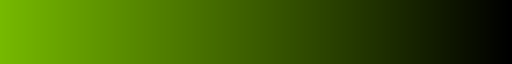

In [3]:
cmap

In [7]:
N=10000
max_iter=200
# x_center = -0.75
# y_center = 0.0
x_center = -0.7
y_center = 0.35
zoom = 0.001

grid = mandelbrot(N=N, max_iter=max_iter, x_center=x_center, y_center=y_center, zoom=zoom)

[]

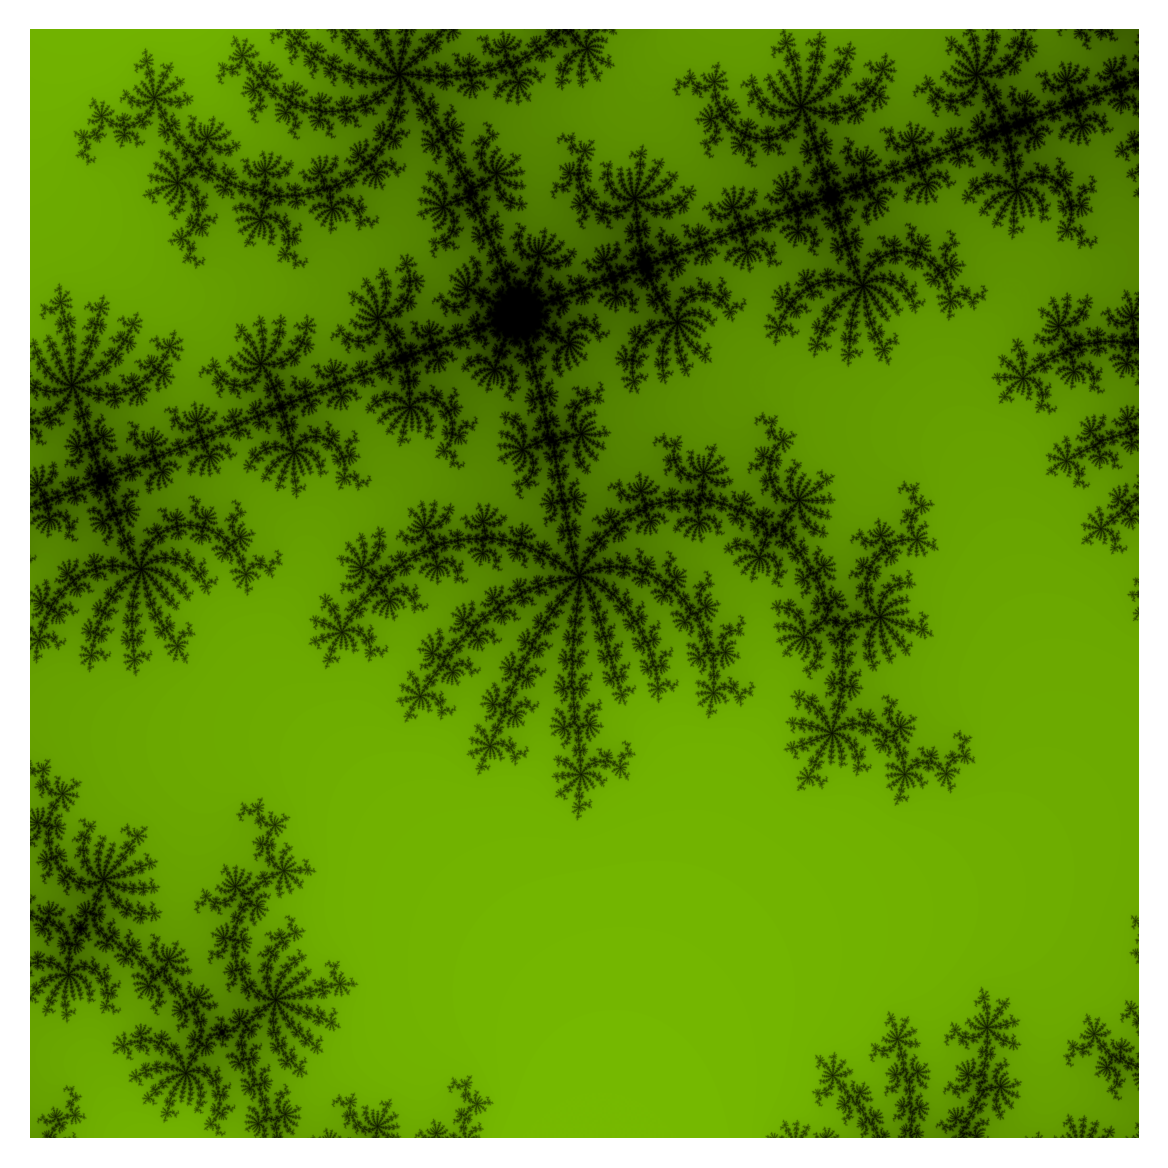

In [5]:
fig, ax = plt.subplots(dpi=300)

ax.imshow(grid, cmap=cmap)
ax.spines[:].set_visible(False)
ax.tick_params(width=0)
ax.set_xticks([])
ax.set_yticks([]);

In [4]:
a = naiive_diffusion(100, 100, 10, central_temperature = 298, spread=5000)

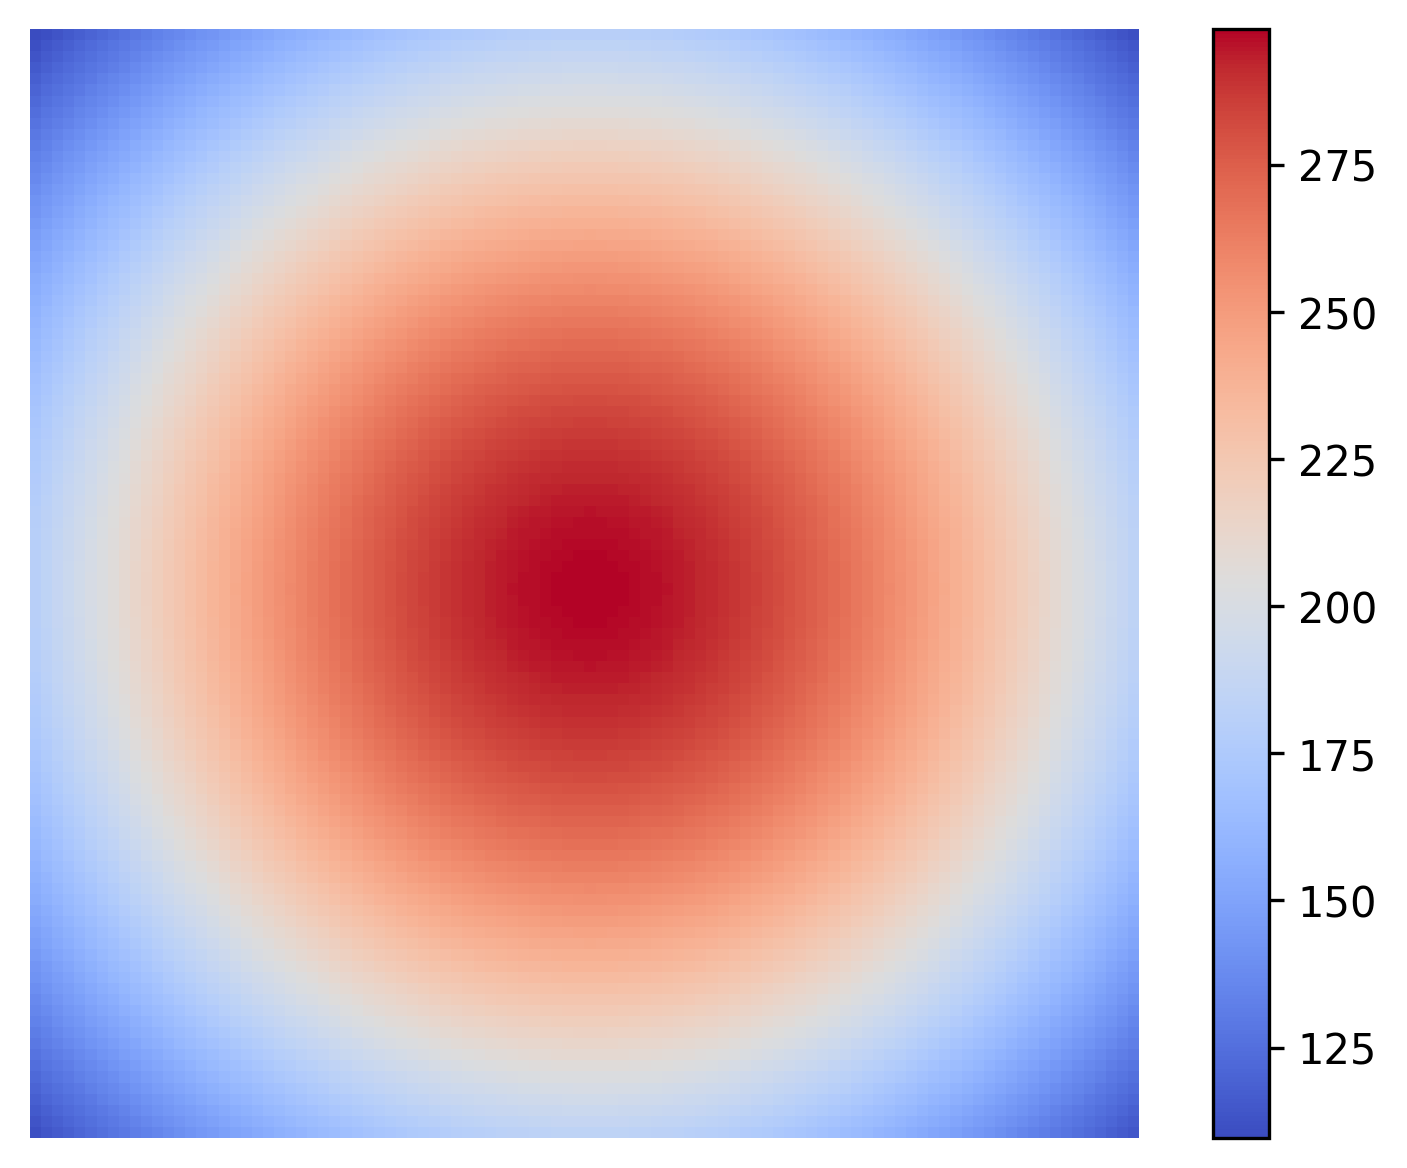

In [7]:
fig, ax = plt.subplots(dpi=300)
    
im = ax.imshow(a[0], 'coolwarm')
cbar = ax.figure.colorbar(im)
ax.spines[:].set_visible(False)
ax.tick_params(width=0)
ax.set_xticks([])
ax.set_yticks([]);

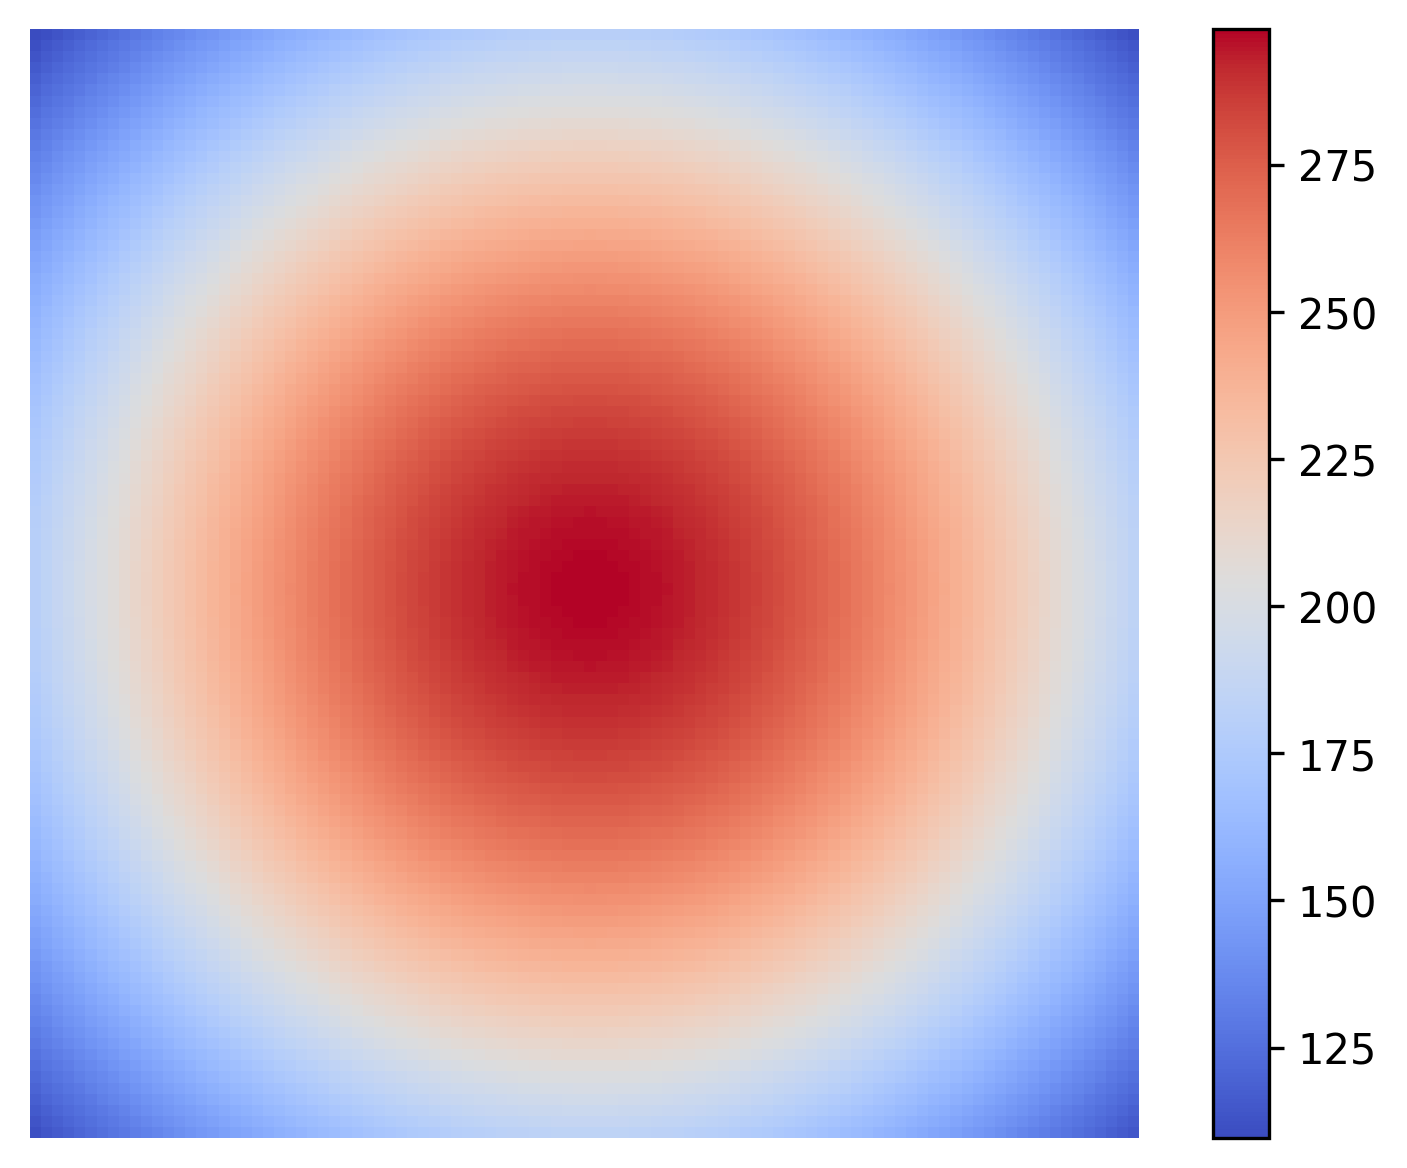

In [8]:
fig, ax = plt.subplots(dpi=300)
    
im = ax.imshow(a[-1], 'coolwarm')
cbar = ax.figure.colorbar(im)
ax.spines[:].set_visible(False)
ax.tick_params(width=0)
ax.set_xticks([])
ax.set_yticks([]);

TypeError: unsupported operand type(s) for -: 'list' and 'list'

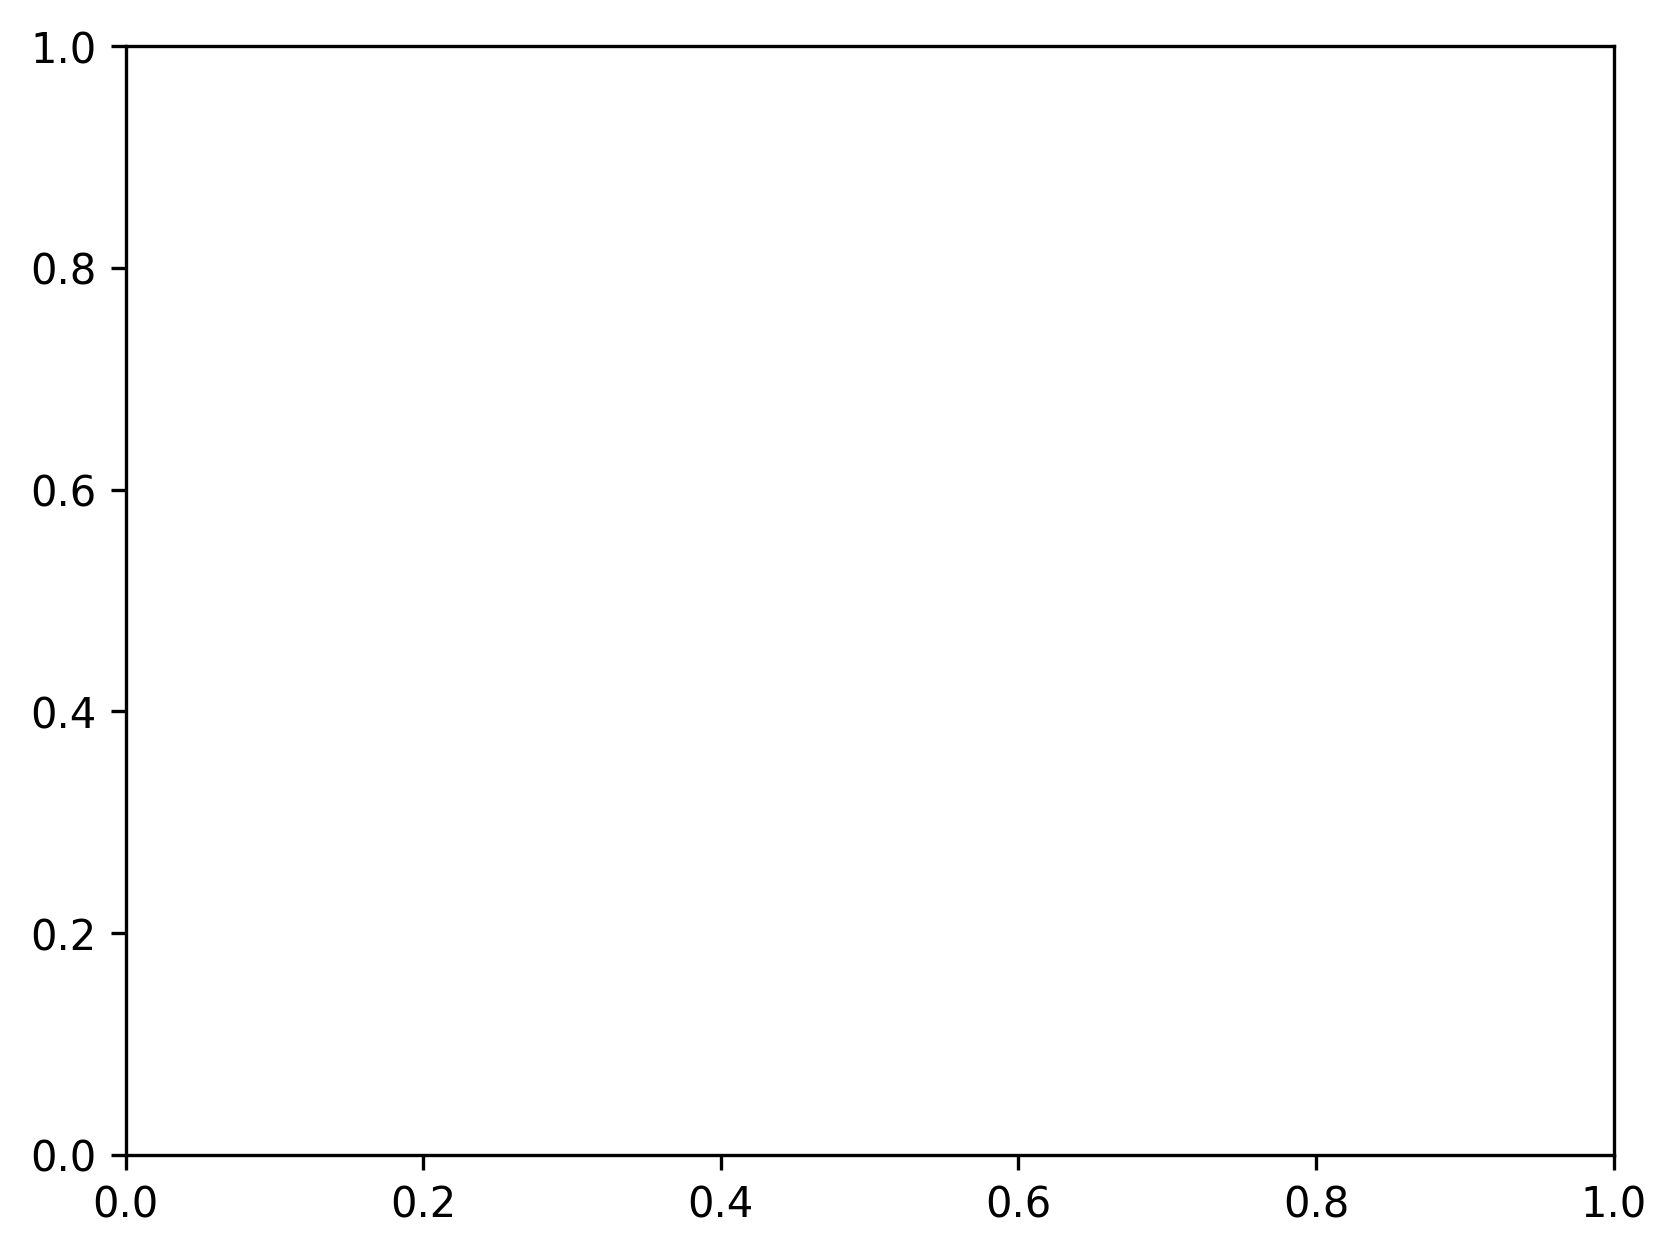

In [9]:
fig, ax = plt.subplots(dpi=300)

for(int y =)

im = ax.imshow(, 'coolwarm')
cbar = ax.figure.colorbar(im)
ax.spines[:].set_visible(False)
ax.tick_params(width=0)
ax.set_xticks([])
ax.set_yticks([]);